In [31]:
from fastai.imports import *
from scipy.stats.stats import pearsonr


In [32]:
cat = pd.read_csv('submissions/submit_ens/cat.csv')
logit = pd.read_csv('submissions/submit_ens/logit.csv')
xgb = pd.read_csv('submissions/submit_ens/xgb.csv')
rf = pd.read_csv('submissions/submit_ens/rf.csv')
lgb = pd.read_csv('submissions/submit_ens/lgb.csv')

In [33]:
rf.name = 'rf'
xgb.name = 'xgb'
logit.name = 'logit'
cat.name = 'cat'
lgb.name = 'lgb'

In [34]:
# correlations

correlations = {}
dfs = [rf,xgb,logit,cat,lgb]

for dfa, dfb in itertools.combinations(dfs, 2):
    correlations[dfa.name + '_' + dfb.name] = pearsonr(dfa.stroke, dfb.stroke)

In [35]:
result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                PCC  p-value
cat_lgb    0.911711      0.0
logit_cat  0.845267      0.0
logit_lgb  0.852503      0.0
rf_cat     0.792429      0.0
rf_lgb     0.814116      0.0
rf_logit   0.850936      0.0
rf_xgb     0.979081      0.0
xgb_cat    0.775918      0.0
xgb_lgb    0.801629      0.0
xgb_logit  0.831515      0.0


In [36]:
xgb[:1]

,id,stroke
0,36306,0.799173


In [6]:
ens = pd.DataFrame()

In [8]:
ens['id'] = cat.id

In [9]:
ens['stroke'] = (cat.stroke + lgb.stroke + logit.stroke + xgb.stroke + rf.stroke)/5.

(array([7860., 2765., 2022., 1754., 1171.,  968., 1379.,  551.,  121.,   10.]),
 array([0.00177, 0.05497, 0.10817, 0.16137, 0.21457, 0.26778, 0.32098, 0.37418, 0.42738, 0.48059, 0.53379]),
 <a list of 10 Patch objects>)

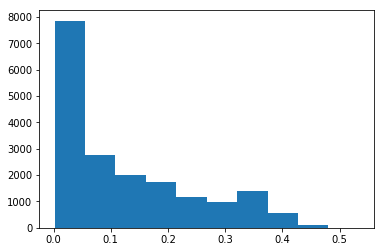

In [10]:
plt.hist(ens.stroke)

In [11]:
ens.stroke.mean()

0.12144355445608727

In [13]:
pred_df = pd.DataFrame(cat.id)
pred_df['stroke'] = ens.stroke
pred_df.to_csv('submissions/ensemble_5models_v1.csv', index=False)

## Ensemble 2

More weight to cat

In [37]:
ens3 = pd.DataFrame()

In [38]:
ens3['id'] = cat.id

In [27]:
ens3['stroke'] = (2*cat.stroke + logit.stroke + 2*xgb.stroke  )/3.

(array([7801., 2945., 2475., 1599., 1363., 1453.,  746.,  194.,   24.,    1.]),
 array([0.00276, 0.05506, 0.10735, 0.15965, 0.21194, 0.26424, 0.31654, 0.36883, 0.42113, 0.47342, 0.52572]),
 <a list of 10 Patch objects>)

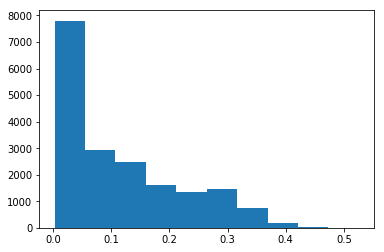

In [28]:
plt.hist(ens2.stroke)

In [29]:
ens2.stroke.mean()

0.11058873248805531

In [30]:
pred_df = pd.DataFrame(cat.id)
pred_df['stroke'] = ens2.stroke
pred_df.to_csv('submissions/ensemble_3models_v1.csv', index=False)

In [6]:
ens = pd.DataFrame()

In [8]:
ens['id'] = cat.id

In [9]:
ens['stroke'] = (cat.stroke + lgb.stroke + logit.stroke + xgb.stroke + rf.stroke)/5.

(array([7860., 2765., 2022., 1754., 1171.,  968., 1379.,  551.,  121.,   10.]),
 array([0.00177, 0.05497, 0.10817, 0.16137, 0.21457, 0.26778, 0.32098, 0.37418, 0.42738, 0.48059, 0.53379]),
 <a list of 10 Patch objects>)

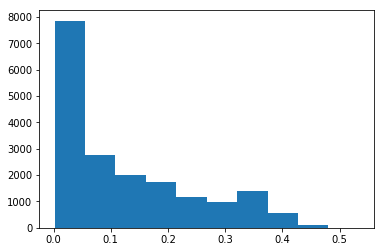

In [10]:
plt.hist(ens.stroke)

In [11]:
ens.stroke.mean()

0.12144355445608727

In [13]:
pred_df = pd.DataFrame(cat.id)
pred_df['stroke'] = ens.stroke
pred_df.to_csv('submissions/ensemble_5models_v1.csv', index=False)